# **Valorización de Días de Descanso de los Accidentes de Trabajo - [Ministerio de Trabajo y Promoción del Empleo - MTPE]**

<div>
    <img style="width:500px; height:400px" src=r"C:\Users\Fabrizio\Documents\Datathon_PNDA\Datathon-PNDA\utils\img\ImgDatathon.jpg"/>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Definición de funciones que se utilizarán en el desarrollo del análisis
def plotDecorator(ax):
    ax.bar_label(ax.containers[0], fontsize=11)
    for i in ['bottom', 'left']:
        ax.spines[i].set_color('black')
        ax.spines[i].set_linewidth(1.5) 
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)

In [69]:
path_local = r'C:\Users\Fabrizio\Documents\Datathon_PNDA\Datathon-PNDA\data'
data = pd.read_csv(path_local + r'\dataset_Accidentes_de_Trabajo.csv', encoding = 'latin-1',
                  converters = {'FECHA_CORTE':str, 'PERIODO_REGISTRO':str, 'FECHA_ACCIDENTE':str,
                               'UBIGEO':str})
data = data.dropna()
data.head()

,FECHA_CORTE,PERIODO_REGISTRO,FECHA_ACCIDENTE,TIPO_ACCIDENTE,SUB_GRUPO_TIPO_ACCIDENTE,AGENTE_CAUSANTE,SUB_GRUPO_AGENTE_CAUSANTE_1,PARTE_AFECTADA,NATURALEZA_LESION,DEPARTAMENTO,...,ESTADO_CIVIL,CATEGORIA_OCUPACIONAL,TIPO_CONTRATO,GRADO_INSTRUCCION,AREA_TRABAJO,EDAD,TURNO_TRABAJO,GRAVEDAD_ACCIDENTE,DIAS_DESCANSO,MONTO_DESCANSO
0,20230511,202304,20230419,ATRAPADA POR UN OBJETO O ENTRE OBJETOS,ATRAPADA POR UN OBJETO,OTROS APARATOS,OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍG...,DEDOS DE LA MANO,HERIDAS CORTANTES,AREQUIPA,...,SOLTERO/A,OTROS,PLAZO FIJO,EDUCACIÓN TÉCNICA COMPLETA(2),MANTENIMIENTO,35.0,DÍA,ACCIDENTE INCAPACITANTE,11.0,1036.38
1,20230511,202304,20230410,ATRAPADA POR UN OBJETO O ENTRE OBJETOS,ATRAPADA POR UN OBJETO,MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN,"MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE ...",MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS),TRAUMATISMOS INTERNOS,LIMA,...,SOLTERO/A,OPERARIO,PLAZO FIJO,EDUCACIÓN SECUNDARIA COMPLETA,PRODUCCIÓN,18.0,DÍA,ACCIDENTE INCAPACITANTE,5.0,349.30
2,20230511,202304,20230410,OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,"MATERIALES, SUSTANCIAS Y RADIACIONES","POLVOS, GASES, LÍQUIDOS Y PRODUCTOS QUÍMICOS, ...","ÓRGANO, APARATO O SISTEMA AFECTADO POR SUSTANC...",INTOXICACIONES,LIMA,...,SOLTERO/A,OPERARIO,INDETERMINADO,EDUCACIÓN SECUNDARIA COMPLETA,PLANTA,32.0,DÍA,ACCIDENTE INCAPACITANTE,1.0,69.86
3,20230511,202304,20230427,PUNZO CORTANTES,NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS),HERIDAS CORTANTES,AREQUIPA,...,SOLTERO/A,PEÓN,TIEMPO PARCIAL,EDUCACIÓN SECUNDARIA COMPLETA,ALBAÑILERIA,20.0,DÍA,ACCIDENTE INCAPACITANTE,5.0,349.30
4,20230511,202304,20230411,CAÍDAS DE OBJETOS,OTRAS CAÍDAS DE OBJETOS,AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...,NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE,"HOMBRO (INCLUSIÓN DE CLAVÍCULAS, OMOPLATO Y AX...",CONTUSIONES,CALLAO,...,SOLTERO/A,EMPLEADO,INDETERMINADO,EDUCACIÓN UNIVERSITARIA INCOMPLETA(4),ALMACÉN,36.0,DÍA,ACCIDENTE INCAPACITANTE,2.0,128.85


## **Entendiendo la estructura de la data y aplicando limpieza**

In [70]:
data.columns

Index(['FECHA_CORTE', 'PERIODO_REGISTRO', 'FECHA_ACCIDENTE', 'TIPO_ACCIDENTE',
       'SUB_GRUPO_TIPO_ACCIDENTE', 'AGENTE_CAUSANTE',
       'SUB_GRUPO_AGENTE_CAUSANTE_1', 'PARTE_AFECTADA', 'NATURALEZA_LESION',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'ACTIVIDAD_ECONOMICA', 'SEGURO_SALUD', 'COBERTURA_PENSION',
       'SEXO_TRABAJADOR', 'ESTADO_CIVIL', 'CATEGORIA_OCUPACIONAL',
       'TIPO_CONTRATO', 'GRADO_INSTRUCCION', 'AREA_TRABAJO', 'EDAD',
       'TURNO_TRABAJO', 'GRAVEDAD_ACCIDENTE', 'DIAS_DESCANSO',
       'MONTO_DESCANSO'],
      dtype='object')

In [71]:
print(f'El dataset cuenta con {data.shape[0]} filas y {data.shape[1]} columnas.')

El dataset cuenta con 30329 filas y 27 columnas.


In [72]:
print("¿El dataset cuenta con valores nulos por columna?")
data.isnull().sum()

¿El dataset cuenta con valores nulos por columna?


FECHA_CORTE                    0
PERIODO_REGISTRO               0
FECHA_ACCIDENTE                0
TIPO_ACCIDENTE                 0
SUB_GRUPO_TIPO_ACCIDENTE       0
AGENTE_CAUSANTE                0
SUB_GRUPO_AGENTE_CAUSANTE_1    0
PARTE_AFECTADA                 0
NATURALEZA_LESION              0
DEPARTAMENTO                   0
PROVINCIA                      0
DISTRITO                       0
UBIGEO                         0
ACTIVIDAD_ECONOMICA            0
SEGURO_SALUD                   0
COBERTURA_PENSION              0
SEXO_TRABAJADOR                0
ESTADO_CIVIL                   0
CATEGORIA_OCUPACIONAL          0
TIPO_CONTRATO                  0
GRADO_INSTRUCCION              0
AREA_TRABAJO                   0
EDAD                           0
TURNO_TRABAJO                  0
GRAVEDAD_ACCIDENTE             0
DIAS_DESCANSO                  0
MONTO_DESCANSO                 0
dtype: int64

In [73]:
print("Tipo de dato de las columnas")
data.dtypes

Tipo de dato de las columnas


FECHA_CORTE                     object
PERIODO_REGISTRO                object
FECHA_ACCIDENTE                 object
TIPO_ACCIDENTE                  object
SUB_GRUPO_TIPO_ACCIDENTE        object
AGENTE_CAUSANTE                 object
SUB_GRUPO_AGENTE_CAUSANTE_1     object
PARTE_AFECTADA                  object
NATURALEZA_LESION               object
DEPARTAMENTO                    object
PROVINCIA                       object
DISTRITO                        object
UBIGEO                          object
ACTIVIDAD_ECONOMICA             object
SEGURO_SALUD                    object
COBERTURA_PENSION               object
SEXO_TRABAJADOR                 object
ESTADO_CIVIL                    object
CATEGORIA_OCUPACIONAL           object
TIPO_CONTRATO                   object
GRADO_INSTRUCCION               object
AREA_TRABAJO                    object
EDAD                           float64
TURNO_TRABAJO                   object
GRAVEDAD_ACCIDENTE              object
DIAS_DESCANSO            

In [74]:
data["MONTO_DESCANSO"] = data["MONTO_DESCANSO"].astype('float') 

## **Análisis Exploratorio de los Datos**

In [75]:
data.describe()

,EDAD,DIAS_DESCANSO,MONTO_DESCANSO
count,30329.000000,30329.000000,30329.000000
mean,35.661380,4.404959,323.323953
std,11.243598,22.083024,1537.749196
min,18.000000,0.000000,0.000000
25%,27.000000,2.000000,78.830000
50%,34.000000,3.000000,181.400000
75%,43.000000,5.000000,319.400000
max,70.000000,2828.000000,184421.420000


1. **Edad**: La edad promedio de los colaboradores que tuvieron un accidente de trabajo es de 36 años. Teniendo como máximo una edad de 70 y mínima de 18 años.

2. **Días descanso**: En promedio, los colaboradores que tuvieron un accidente de trabajo se le asignaron 5 días de descanso.

3. **Monto del descanso**: La valoración promedio asignada a los días de descanso por el accidente de trajado es de S/. 323, pero con un monto máximo alrededor de S/. 18,000.

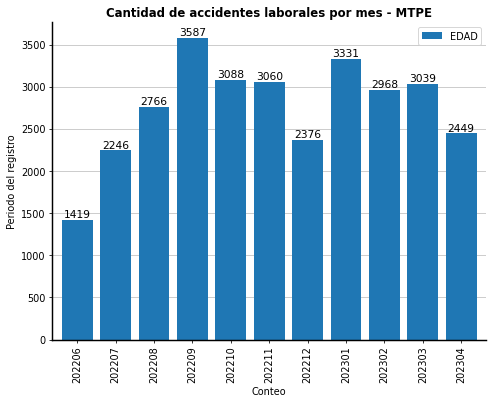

In [76]:
df1 = pd.DataFrame(data.groupby("PERIODO_REGISTRO")["EDAD"].count(
)).reset_index().sort_values("PERIODO_REGISTRO", ascending = True).set_index("PERIODO_REGISTRO")
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df1.plot(ax = ax, kind = 'bar', width=0.8)
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Periodo del registro")
plt.title("Cantidad de accidentes laborales por mes - MTPE", size = 12, fontweight = 'bold')
plt.show()

In [77]:
print(f"El crecimiento promedio mensual de la cantidad de accidentes laborales registrados por mes es de {round(df1.pct_change().dropna().mean().values[0]*100,2)}%.")

El crecimiento promedio mensual de la cantidad de accidentes laborales registrados por mes es de 8.62%.


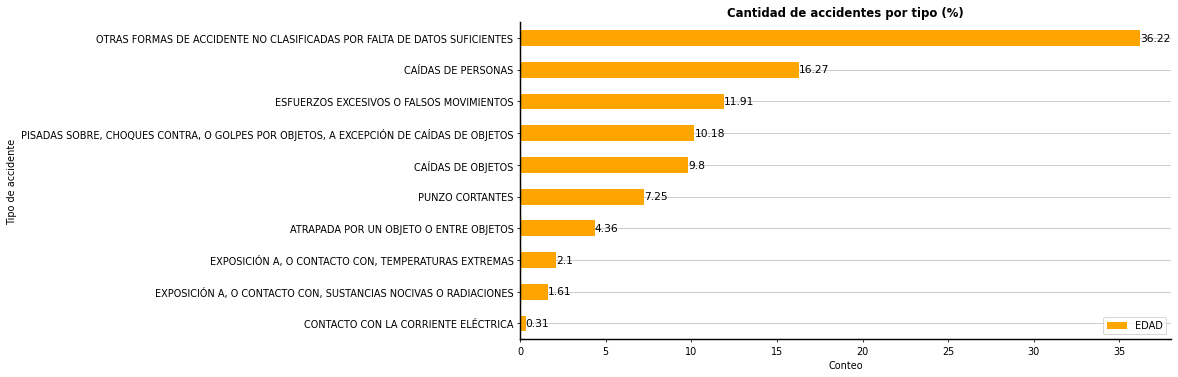

In [78]:
df2 = pd.DataFrame(data.groupby("TIPO_ACCIDENTE")["EDAD"].count(
    )).apply(lambda x : round(x / len(data["EDAD"])*100,2)).sort_values("EDAD")
fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
df2.plot(kind = 'barh', ax = ax, color = 'orange')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Tipo de accidente")
plt.title("Cantidad de accidentes por tipo (%)", size = 12, fontweight = 'bold')
plt.show()

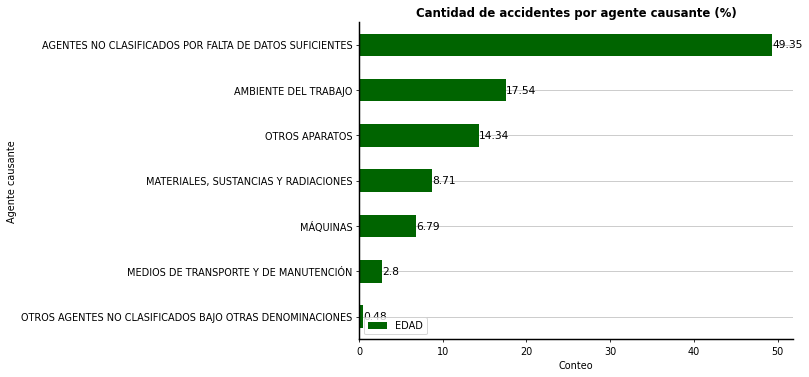

In [79]:
df3 = pd.DataFrame(data.groupby("AGENTE_CAUSANTE")["EDAD"].count()).apply(lambda x : round(x / len(data["EDAD"])*100,2))
df3 = df3.sort_values("EDAD")
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df3.plot(kind = 'barh', ax = ax, color = 'darkgreen')
plotDecorator(ax)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.xlabel("Conteo")
plt.ylabel("Agente causante")
plt.title("Cantidad de accidentes por agente causante (%)", size = 12, fontweight = 'bold')
plt.show()

In [80]:
pd.set_option('display.max_rows', None)
df4 = pd.DataFrame(data.groupby(["TIPO_ACCIDENTE", "AGENTE_CAUSANTE"])["EDAD"].count())
df4.sort_values(by=["TIPO_ACCIDENTE", "EDAD"], ascending = False)

EDAD
TIPO_ACCIDENTE                                     AGENTE_CAUSANTE                                         
PUNZO CORTANTES                                    AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...   911
                                                   OTROS APARATOS                                       503
                                                   MÁQUINAS                                             312
                                                   AMBIENTE DEL TRABAJO                                 245
                                                   MATERIALES, SUSTANCIAS Y RADIACIONES                 218
                                                   MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                  9
                                                   OTROS AGENTES NO CLASIFICADOS BAJO OTRAS DENOMI...     1
PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJ... AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...   816
                                                   OTROS APARATOS                                       710
                                                   AMBIENTE DEL TRABAJO                                 515
                                                   MATERIALES, SUSTANCIAS Y RADIACIONES                 427
                                                   MÁQUINAS                                             367
                                                   MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                249
                                                   OTROS AGENTES NO CLASIFICADOS BAJO OTRAS DENOMI...     3
OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR F... AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...  8096
                                                   OTROS APARATOS                                       873
                                                   AMBIENTE DEL TRABAJO                                 858
                                                   MATERIALES, SUSTANCIAS Y RADIACIONES                 482
                                                   MÁQUINAS                                             385
                                                   MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                170
                                                   OTROS AGENTES NO CLASIFICADOS BAJO OTRAS DENOMI...   122
EXPOSICIÓN A, O CONTACTO CON, TEMPERATURAS EXTR... MATERIALES, SUSTANCIAS Y RADIACIONES                 211
                                                   AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...   201
                                                   AMBIENTE DEL TRABAJO                                  83
                                                   OTROS APARATOS                                        80
                                                   MÁQUINAS                                              59
                                                   MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                  3
EXPOSICIÓN A, O CONTACTO CON, SUSTANCIAS NOCIVA... MATERIALES, SUSTANCIAS Y RADIACIONES                 360
                                                   AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...    84
                                                   AMBIENTE DEL TRABAJO                                  24
                                                   MÁQUINAS                                              11
                                                   OTROS APARATOS                                         8
ESFUERZOS EXCESIVOS O FALSOS MOVIMIENTOS           AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...  1798
                                                   AMBIENTE DEL TRABAJO                                 680
                                                   OTROS APARATOS                                       546
                                                   MATERIALES, SUSTANCIAS Y RADIACIONES                 333

In [81]:
pd.set_option('display.max_rows',None)
df5 = pd.DataFrame(data.groupby(["TIPO_ACCIDENTE","SUB_GRUPO_AGENTE_CAUSANTE_1"])["EDAD"].count(
        )).sort_values(["TIPO_ACCIDENTE","EDAD"], ascending = False)
df5

EDAD
TIPO_ACCIDENTE                                     SUB_GRUPO_AGENTE_CAUSANTE_1                             
PUNZO CORTANTES                                    NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE             912
                                                   OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍGR...   305
                                                   OTROS MATERIALES Y SUSTANCIAS NO CLASIFICADOS B...   209
                                                   INTERIOR                                             203
                                                   HERRAMIENTAS, IMPLEMENTOS Y UTENSILIOS, A EXCEP...   160
                                                   OTRAS MÁQUINAS NO CLASIFICADAS BAJO OTROS EPÍGR...   150
                                                   MÁQUINAS PARA EL TRABAJO DEL METAL                    94
                                                   MÁQUINAS PARA TRABAJAR LA MADERA Y OTRAS MATERI...    58
                                                   EXTERIOR                                              42
                                                   HERRAMIENTAS ELÉCTRICAS MANUALES                      28
                                                   FRAGMENTOS VOLANTES                                    6
                                                   MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE L...     5
                                                   INSTALACIONES ELÉCTRICAS,INCLUIDOS LOS MOTORES ...     4
                                                   ANDAMIOS                                               3
                                                   GENERADORES DE ENERGÍA, EXCEPTO MOTORES ELÉCTRICOS     3
                                                   MÁQUINAS AGRÍCOLAS                                     3
                                                   OTROS MEDIOS DE TRANSPORTE                             3
                                                   POLVOS, GASES, LÍQUIDOS Y PRODUCTOS QUÍMICOS, A...     3
                                                   MÁQUINAS PARA EL TRABAJO EN LAS MINAS                  2
                                                   SISTEMAS DE TRANSMISIÓN                                2
                                                   ANIMALES                                               1
                                                   HORNOS, FOGONES, ESTUFAS                               1
                                                   MEDIOS DE TRANSPORTE POR VÍA FÉRREA                    1
                                                   RECIPIENTES DE PRESIÓN                                 1
PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJ... NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE             816
                                                   OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍGR...   441
                                                   INTERIOR                                             378
                                                   OTROS MATERIALES Y SUSTANCIAS NO CLASIFICADOS B...   301
                                                   OTRAS MÁQUINAS NO CLASIFICADAS BAJO OTROS EPÍGR...   215
                                                   HERRAMIENTAS, IMPLEMENTOS Y UTENSILIOS, A EXCEP...   164
                                                   MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE L...   136
                                                   EXTERIOR                                             128
                                                   FRAGMENTOS VOLANTES                                   79
                                                   OTROS MEDIOS DE TRANSPORTE                            72
                                                   MÁQUINAS PARA EL TRABAJO DEL METAL                    68
                                                   POLVOS, GASES, LÍQUIDOS Y PRODUCTOS QUÍMICOS, A...    46

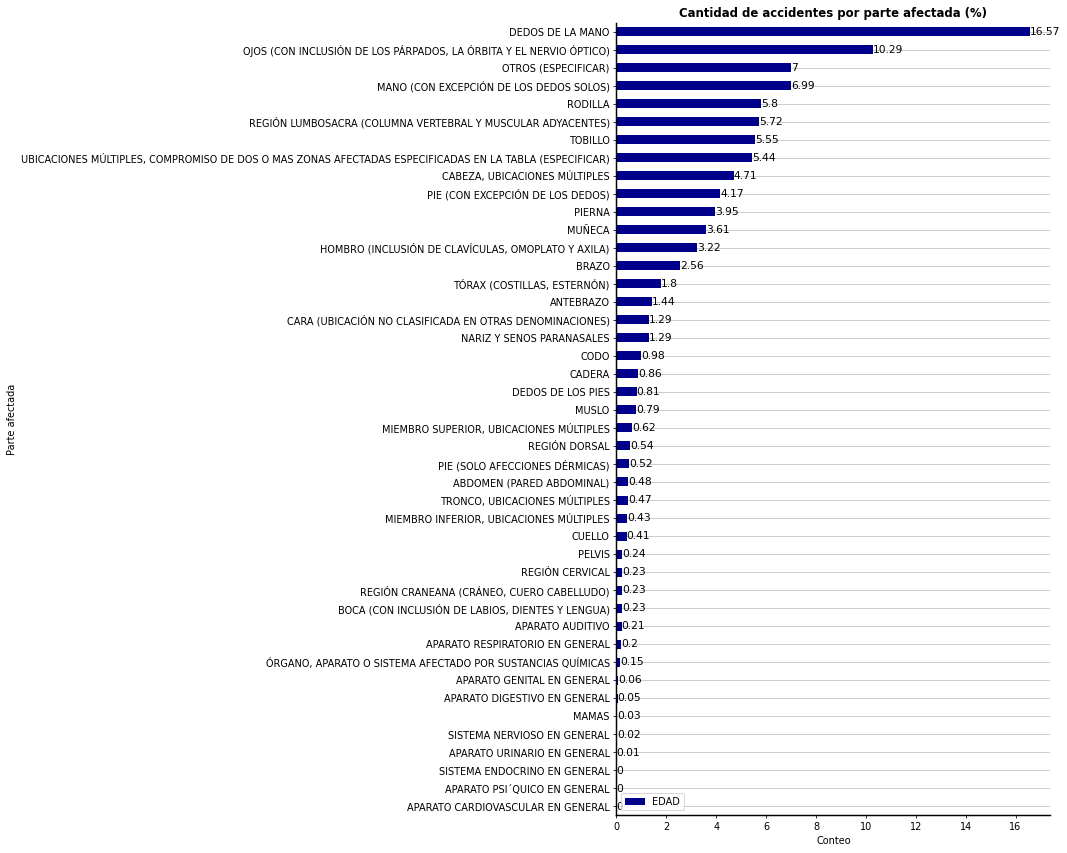

In [82]:
pd.reset_option('display.max_rows')
df6 = pd.DataFrame(data.groupby("PARTE_AFECTADA")["EDAD"].count()).sort_values("EDAD", ascending = True).apply(lambda x :
                    round(x/len(data["EDAD"])*100,2))
fig, ax = plt.subplots(figsize = (8,15), dpi = 70)
df6.plot(kind = 'barh', ax = ax, color = 'darkblue')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Parte afectada")
plt.title("Cantidad de accidentes por parte afectada (%)", size = 12, fontweight = 'bold')
plt.show()

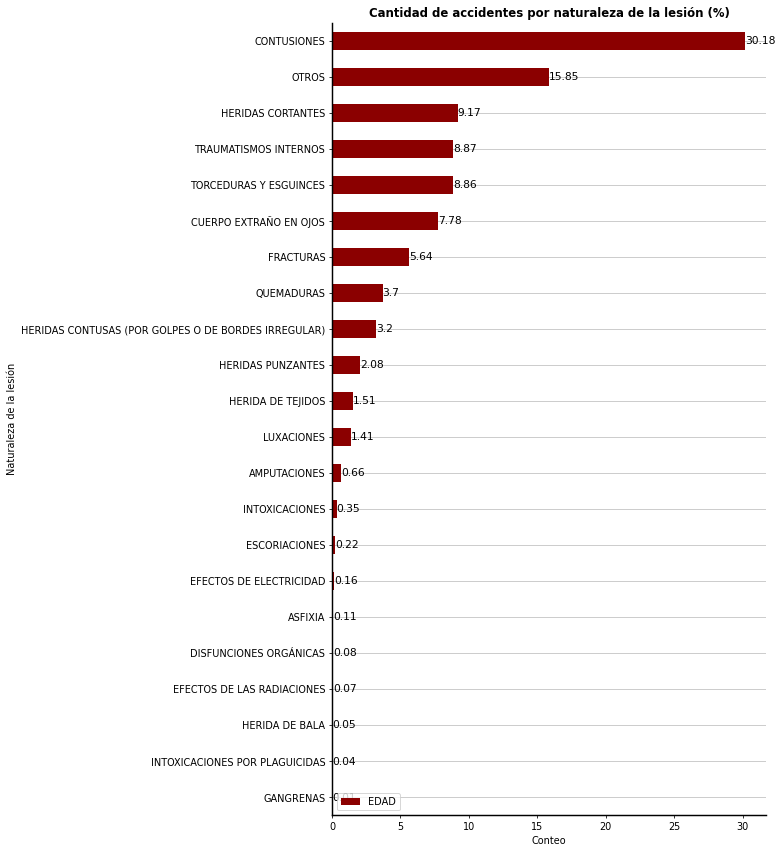

In [83]:
df7 = pd.DataFrame(data.groupby("NATURALEZA_LESION")["EDAD"].count()).sort_values("EDAD", ascending = True).apply(
    lambda x : round(x/len(data["EDAD"])*100,2)
)
fig, ax = plt.subplots(figsize = (8,15), dpi = 70)
df7.plot(kind = 'barh', ax = ax, color = 'darkred')
plotFunction(ax)
plt.xlabel("Conteo")
plt.ylabel("Naturaleza de la lesión")
plt.title("Cantidad de accidentes por naturaleza de la lesión (%)", size = 12, fontweight = 'bold')
plt.show()